# exploratory data analysis for wild blue berry yield

In [11]:
# import packages 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
# import data from csv
df  = pd.read_csv('E:/blueberry/Notebook/data/train.csv')

In [13]:
# print out the first five rows of the data set
df.head(5)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


* Clonesize m2 The average blueberry clone size in the field
* Honeybee bees/m2/min Honeybee density in the field
* Bumbles bees/m2/min Bumblebee density in the field
* Andrena bees/m2/min Andrena bee density in the field
* Osmia bees/m2/min Osmia bee density in the field
* MaxOfUpperTRange ℃ The highest record of the upper band daily air temperature during the bloom season
* MinOfUpperTRange ℃ The lowest record of the upper band daily air temperature
* AverageOfUpperTRange ℃ The average of the upper band daily air temperature
* MaxOfLowerTRange ℃ The highest record of the lower band daily air temperature
* MinOfLowerTRange ℃ The lowest record of the lower band daily air temperature
* AverageOfLowerTRange ℃ The average of the lower band daily air temperature
* RainingDays Day The total number of days during the bloom season, each of which has precipitation larger than zero
* AverageRainingDays Day The average of raining days of the entire bloom season

In [14]:
# we get rid of the column 'id'
df = df.drop('id', axis='columns')

In [15]:
# check out the shape of the dataset
df.shape

(15289, 17)

## Missing value 

In [16]:
# check the number of missing values in the dataset
df.isna().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

## check the duplicates

There are 7 duplicates 

In [17]:
df = df.drop_duplicates()

## Check the data type of each column

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15282 entries, 0 to 15288
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             15282 non-null  float64
 1   honeybee              15282 non-null  float64
 2   bumbles               15282 non-null  float64
 3   andrena               15282 non-null  float64
 4   osmia                 15282 non-null  float64
 5   MaxOfUpperTRange      15282 non-null  float64
 6   MinOfUpperTRange      15282 non-null  float64
 7   AverageOfUpperTRange  15282 non-null  float64
 8   MaxOfLowerTRange      15282 non-null  float64
 9   MinOfLowerTRange      15282 non-null  float64
 10  AverageOfLowerTRange  15282 non-null  float64
 11  RainingDays           15282 non-null  float64
 12  AverageRainingDays    15282 non-null  float64
 13  fruitset              15282 non-null  float64
 14  fruitmass             15282 non-null  float64
 15  seeds                 15

## check the uniqueness of values in each column

In [19]:
df.nunique()

clonesize                  6
honeybee                   7
bumbles                   11
andrena                   16
osmia                     14
MaxOfUpperTRange           6
MinOfUpperTRange           5
AverageOfUpperTRange       5
MaxOfLowerTRange           6
MinOfLowerTRange           7
AverageOfLowerTRange       5
RainingDays                6
AverageRainingDays         8
fruitset                1526
fruitmass               1515
seeds                   2066
yield                    776
dtype: int64

## Histogram and Density plot

In [20]:
sns.set_style("darkgrid") 
color = sns.set_palette("flare")

### Univariate analysis

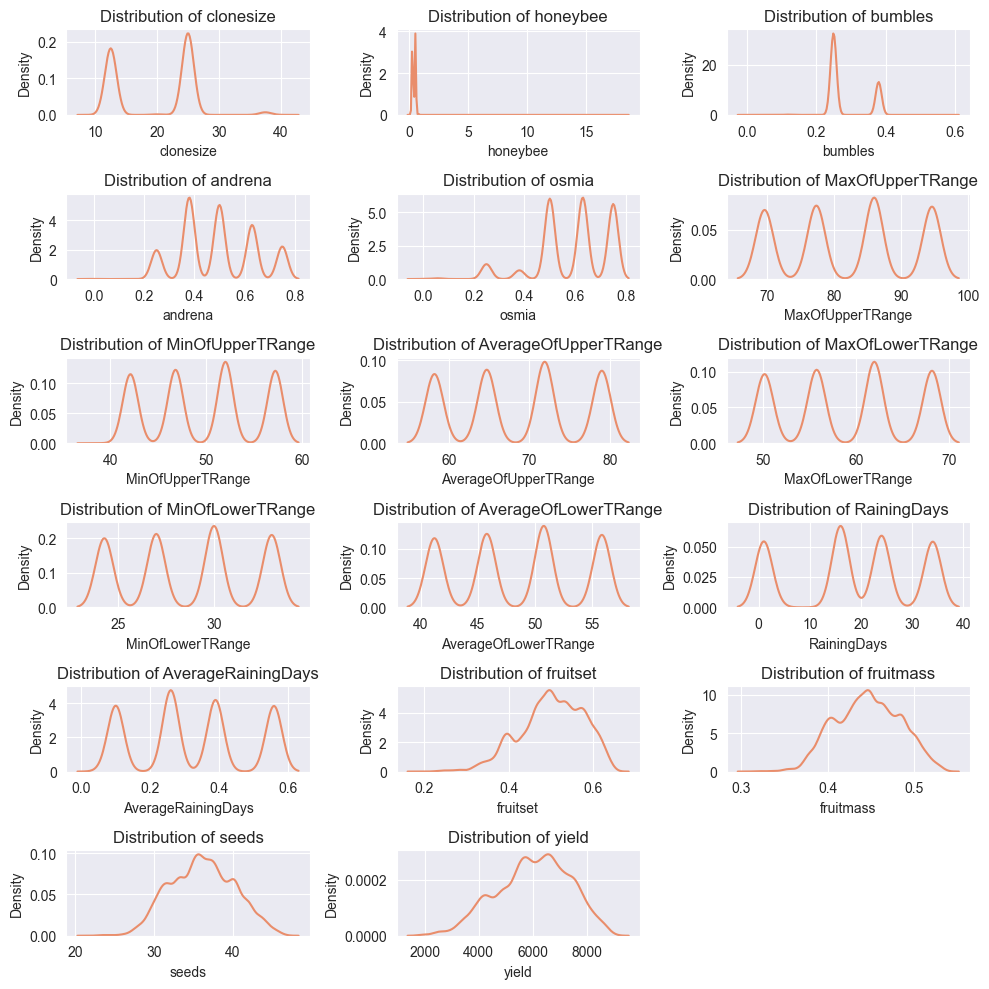

In [21]:
fig, axis = plt.subplots(6,3,figsize=(10,10))
axis = axis.flatten()
for index,colname in enumerate(df.columns):
    sns.kdeplot(df[colname], ax=axis[index], color=color)
    axis[index].set_title(f"Distribution of {colname}")
    axis[index].set_xlabel(f"{colname}")
fig.delaxes(axis[-1])
plt.tight_layout()
plt.show()

## Bivariate analysis

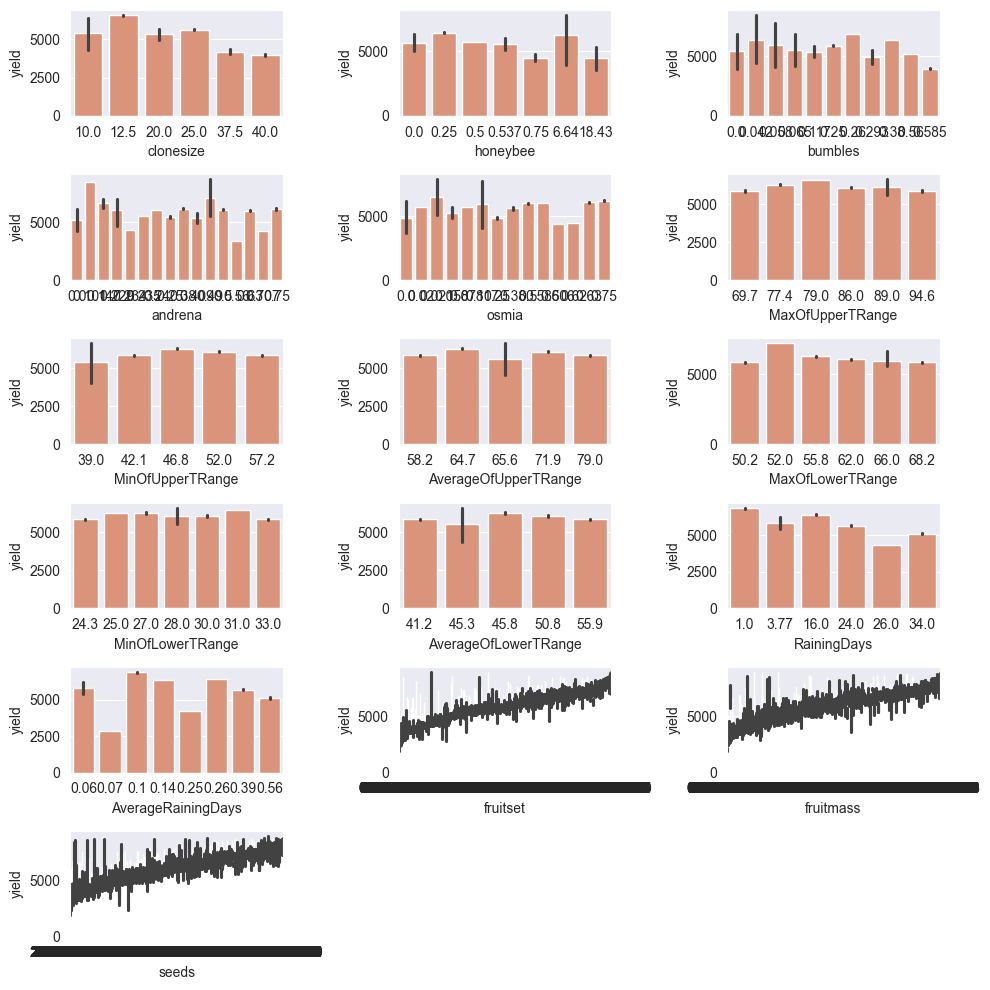

In [22]:

fig, axis = plt.subplots(6,3,figsize=(10,10))
axis = axis.flatten()
for index, colname in enumerate(df.columns):
    sns.barplot(data=df, x=f"{colname}", y="yield",color=color,ax=axis[index])
    axis[index].set_xlabel(f"{colname}")
    axis[index].set_ylabel("yield")
fig.delaxes(axis[-1])
fig.delaxes(axis[-2])
plt.tight_layout()
plt.show()

## Correlation matrix

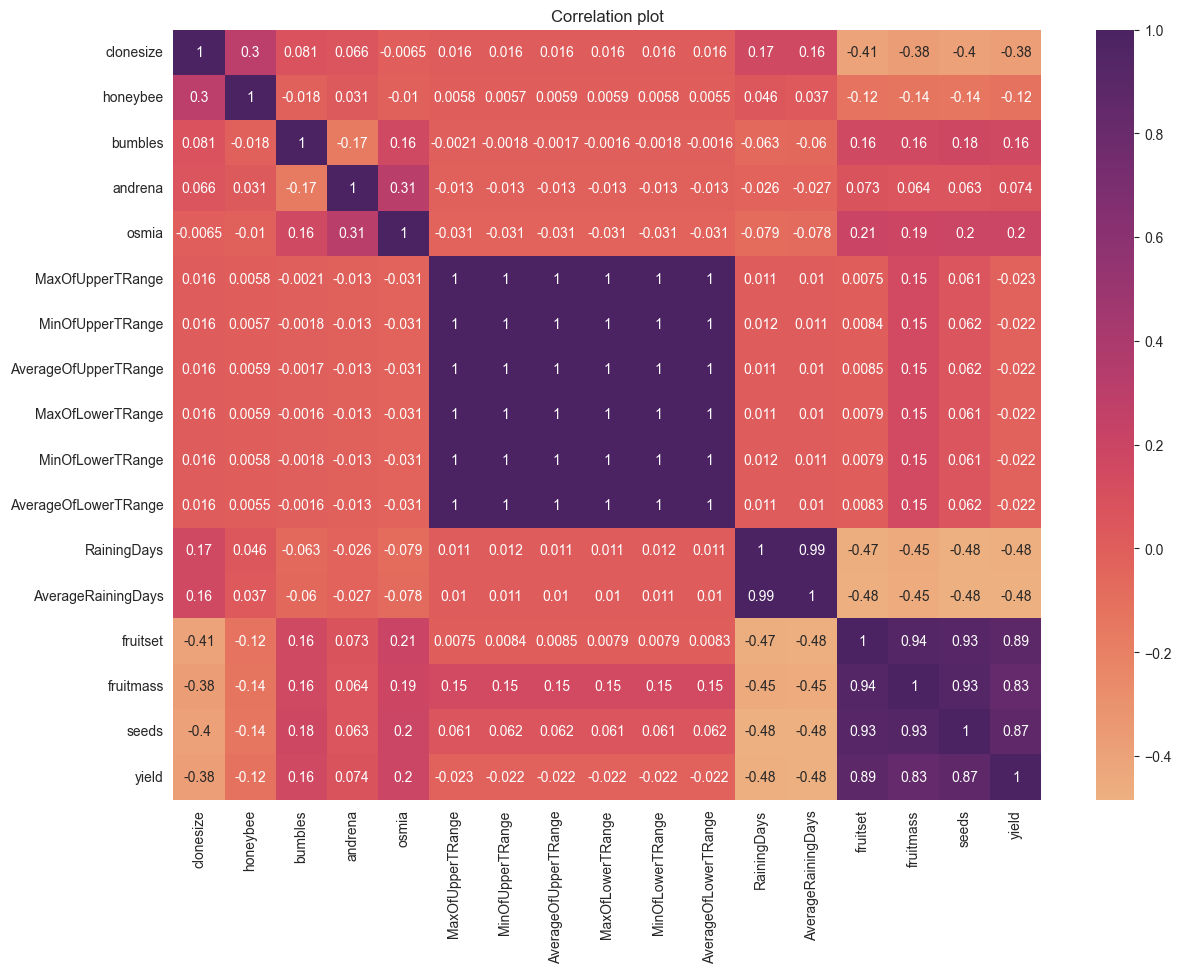

In [23]:
matrix  = df.corr()
plt.figure(figsize = (14, 10))
sns.heatmap( matrix, cmap='flare',annot=True)
plt.title("Correlation plot")
plt.show()

From the variables related to temperature, we only keep MaxOfUpperTRange because the correlation coefficent score is exactly one. For the same reason, we drop the AverageRainingDays and keep the total Raining Days. Other features can be selected by either filter method, embedding method or wrapper method.

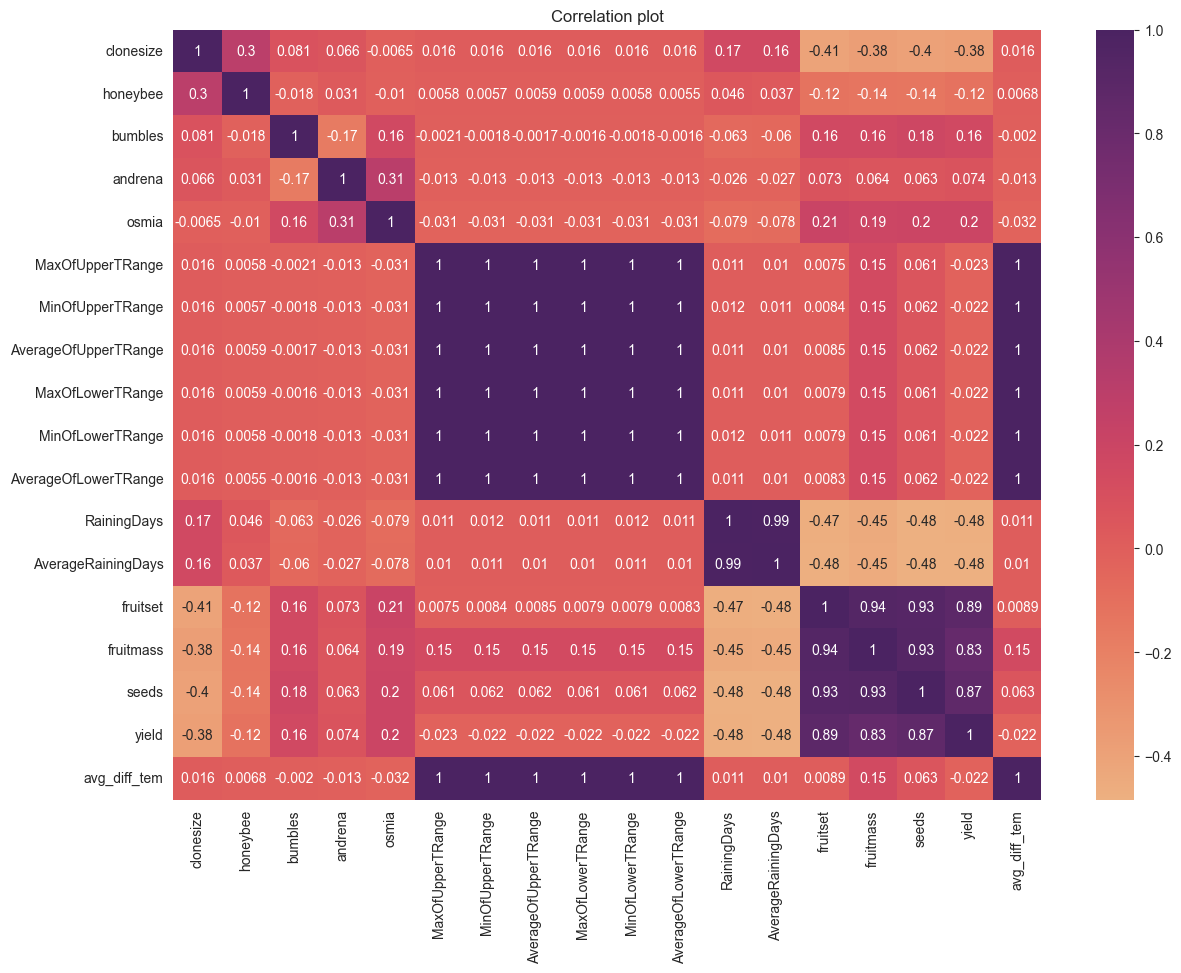

In [65]:
matrix  = df.corr()
plt.figure(figsize = (14, 10))
sns.heatmap( matrix, cmap='flare',annot=True)
plt.title("Correlation plot")
plt.show()